In [32]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import ssl
import os

In [33]:
# ✅ Fix SSL certificate verification issue
ssl._create_default_https_context = ssl._create_unverified_context

In [34]:
# ✅ Updated data path (no train/val/test directories; direct class folders under 'Body Parts')
data_dir = 'Body Parts/Eye'  # Example: 'Body Parts/Eye', 'Body Parts/Face', etc.


In [35]:
# Image dimensions and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32


In [36]:
# ✅ Data augmentation and data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # ✅ Split data into 80% train and 20% validation
)


In [37]:
# ✅ Generator function
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 436 images belonging to 6 classes.
Found 106 images belonging to 6 classes.


In [38]:
# ✅ Debugging: Verify classes
print("Classes found:", train_generator.class_indices)
num_classes = train_generator.num_classes
print(f"Number of classes detected: {num_classes}")

Classes found: {'Bulging Eyes': 0, 'Cataracts': 1, 'Crossed Eyes': 2, 'Glaucoma': 3, 'Healthy Eye': 4, 'Uveitis': 5}
Number of classes detected: 6


In [39]:
# ✅ Build VGG16 model
def build_vgg16_model(num_classes):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [ ]:
# ✅ Callbacks to save the model
def get_callbacks(model_name):
    return [
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        ModelCheckpoint(filepath=f'{model_name}_saved_model_Eye', save_format='tf', monitor='val_loss', save_best_only=True)  # ✅ TensorFlow SavedModel format
    ]


In [41]:
# ✅ Training function
def train_model(model, model_name):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(
        train_generator,
        epochs=20,
        validation_data=val_generator,
        callbacks=get_callbacks(model_name)
    )

    # ✅ Save final model in TensorFlow SavedModel format
    model_save_path = f'{model_name}_final_saved_model'
    model.save(model_save_path, save_format='tf')
    print(f"✅ Final model saved at: {model_save_path}")
    return history

In [42]:
# ✅ Build and train VGG16 model
print("Building and training VGG16 model...")
model = build_vgg16_model(num_classes)
history = train_model(model, 'BodyParts_VGG16')

Building and training VGG16 model...
Epoch 1/20
14/14 [==============================] - ETA: 0s - loss: 1.7492 - accuracy: 0.3119

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Eye/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Eye/assets


14/14 [==============================] - 56s 4s/step - loss: 1.7492 - accuracy: 0.3119 - val_loss: 1.5235 - val_accuracy: 0.4057
Epoch 2/20
14/14 [==============================] - ETA: 0s - loss: 1.3954 - accuracy: 0.4748

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Eye/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Eye/assets


14/14 [==============================] - 61s 4s/step - loss: 1.3954 - accuracy: 0.4748 - val_loss: 1.3043 - val_accuracy: 0.5283
Epoch 3/20
14/14 [==============================] - ETA: 0s - loss: 1.3415 - accuracy: 0.5413

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Eye/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Eye/assets


14/14 [==============================] - 65s 5s/step - loss: 1.3415 - accuracy: 0.5413 - val_loss: 1.2694 - val_accuracy: 0.5377
Epoch 4/20
14/14 [==============================] - ETA: 0s - loss: 1.2044 - accuracy: 0.5803

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Eye/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Eye/assets


14/14 [==============================] - 61s 4s/step - loss: 1.2044 - accuracy: 0.5803 - val_loss: 1.2089 - val_accuracy: 0.5849
Epoch 5/20
14/14 [==============================] - ETA: 0s - loss: 1.1683 - accuracy: 0.5803

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Eye/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Eye/assets


14/14 [==============================] - 66s 5s/step - loss: 1.1683 - accuracy: 0.5803 - val_loss: 1.1804 - val_accuracy: 0.5755
Epoch 6/20
14/14 [==============================] - ETA: 0s - loss: 1.1056 - accuracy: 0.6078

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Eye/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Eye/assets


14/14 [==============================] - 67s 5s/step - loss: 1.1056 - accuracy: 0.6078 - val_loss: 1.1590 - val_accuracy: 0.6038
Epoch 7/20
14/14 [==============================] - ETA: 0s - loss: 1.1114 - accuracy: 0.5986

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Eye/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Eye/assets


14/14 [==============================] - 66s 5s/step - loss: 1.1114 - accuracy: 0.5986 - val_loss: 1.1312 - val_accuracy: 0.6604
Epoch 8/20
14/14 [==============================] - 68s 5s/step - loss: 1.0585 - accuracy: 0.6101 - val_loss: 1.1455 - val_accuracy: 0.5943
Epoch 9/20
14/14 [==============================] - ETA: 0s - loss: 1.0953 - accuracy: 0.6055

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Eye/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Eye/assets


14/14 [==============================] - 170s 13s/step - loss: 1.0953 - accuracy: 0.6055 - val_loss: 1.0807 - val_accuracy: 0.5566
Epoch 10/20
14/14 [==============================] - 87s 6s/step - loss: 1.0112 - accuracy: 0.6261 - val_loss: 1.1081 - val_accuracy: 0.6321
Epoch 11/20
14/14 [==============================] - ETA: 0s - loss: 0.9506 - accuracy: 0.6560

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Eye/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Eye/assets


14/14 [==============================] - 72s 5s/step - loss: 0.9506 - accuracy: 0.6560 - val_loss: 1.0690 - val_accuracy: 0.6321
Epoch 12/20
14/14 [==============================] - 165s 12s/step - loss: 1.0205 - accuracy: 0.6399 - val_loss: 1.0971 - val_accuracy: 0.6038
Epoch 13/20
14/14 [==============================] - ETA: 0s - loss: 0.9476 - accuracy: 0.6835 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Eye/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Eye/assets


14/14 [==============================] - 326s 24s/step - loss: 0.9476 - accuracy: 0.6835 - val_loss: 1.0402 - val_accuracy: 0.6321
Epoch 14/20
14/14 [==============================] - 279s 20s/step - loss: 0.9392 - accuracy: 0.6606 - val_loss: 1.0562 - val_accuracy: 0.6226
Epoch 15/20
14/14 [==============================] - 206s 15s/step - loss: 0.8946 - accuracy: 0.7018 - val_loss: 1.0810 - val_accuracy: 0.6415
Epoch 16/20
14/14 [==============================] - ETA: 0s - loss: 0.8907 - accuracy: 0.6628 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Eye/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Eye/assets


14/14 [==============================] - 211s 15s/step - loss: 0.8907 - accuracy: 0.6628 - val_loss: 1.0369 - val_accuracy: 0.6604
Epoch 17/20
14/14 [==============================] - ETA: 0s - loss: 0.8972 - accuracy: 0.6606 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Eye/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Eye/assets


14/14 [==============================] - 213s 15s/step - loss: 0.8972 - accuracy: 0.6606 - val_loss: 1.0265 - val_accuracy: 0.6415
Epoch 18/20
14/14 [==============================] - ETA: 0s - loss: 0.8771 - accuracy: 0.6720 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Eye/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Eye/assets


14/14 [==============================] - 212s 15s/step - loss: 0.8771 - accuracy: 0.6720 - val_loss: 1.0010 - val_accuracy: 0.6604
Epoch 19/20
14/14 [==============================] - 208s 15s/step - loss: 0.8429 - accuracy: 0.6766 - val_loss: 1.0215 - val_accuracy: 0.6415
Epoch 20/20
14/14 [==============================] - 228s 16s/step - loss: 0.8499 - accuracy: 0.6766 - val_loss: 1.0146 - val_accuracy: 0.6415
INFO:tensorflow:Assets written to: BodyParts_VGG16_final_saved_model/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_final_saved_model/assets


✅ Final model saved at: BodyParts_VGG16_final_saved_model


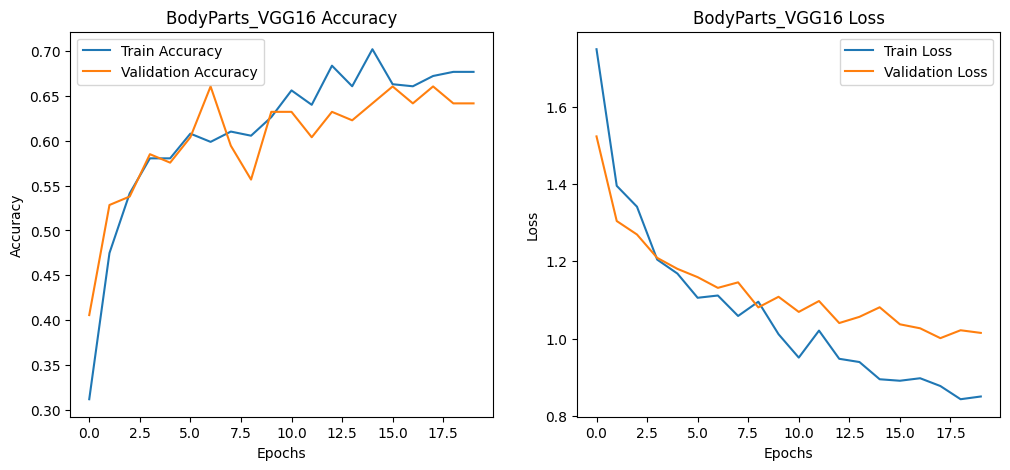

In [43]:
# ✅ Plot training history
def plot_history(history, title):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history, 'BodyParts_VGG16')


In [44]:
# Save final models in TensorFlow SavedModel format
model.save('Eye_model')  

INFO:tensorflow:Assets written to: Eye_model/assets


INFO:tensorflow:Assets written to: Eye_model/assets
